In [1]:
#Import the required Libraries.
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
que = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding='latin1')
que.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [4]:
ans = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding='latin1')
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [5]:
tags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding='latin1')
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [6]:
user = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv", encoding='latin1')
user.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [7]:
user = user.drop_duplicates(subset=['id'])

In [8]:
que = que.drop_duplicates(subset=['Id'])

In [9]:
ans = ans.drop_duplicates(subset=['Id'])

In [10]:
user.head()



,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [11]:
len(user['creation_date'].str.contains("UTC") )

465460

In [12]:
user.shape

(465460, 9)

In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        465460 non-null  int64 
 1   id                465460 non-null  int64 
 2   display_name      465436 non-null  object
 3   creation_date     465460 non-null  object
 4   last_access_date  465460 non-null  object
 5   reputation        465460 non-null  int64 
 6   up_votes          465460 non-null  int64 
 7   down_votes        465460 non-null  int64 
 8   views             465460 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 35.5+ MB


In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        465460 non-null  int64 
 1   id                465460 non-null  int64 
 2   display_name      465436 non-null  object
 3   creation_date     465460 non-null  object
 4   last_access_date  465460 non-null  object
 5   reputation        465460 non-null  int64 
 6   up_votes          465460 non-null  int64 
 7   down_votes        465460 non-null  int64 
 8   views             465460 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 35.5+ MB


In [15]:
user.creation_date =user.creation_date.astype("datetime64") 
user.last_access_date =user.last_access_date.astype("datetime64") 

In [16]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        465460 non-null  int64         
 1   id                465460 non-null  int64         
 2   display_name      465436 non-null  object        
 3   creation_date     465460 non-null  datetime64[ns]
 4   last_access_date  465460 non-null  datetime64[ns]
 5   reputation        465460 non-null  int64         
 6   up_votes          465460 non-null  int64         
 7   down_votes        465460 non-null  int64         
 8   views             465460 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 35.5+ MB


In [17]:
user['cre_date'] = [d.date() for d in user['creation_date']]
user['cre_time(UTC)'] = [d.time() for d in user['creation_date']]
user['lastA_date'] = [d.date() for d in user['last_access_date']]
user['LastA_time(UTC)'] = [d.time() for d in user['last_access_date']]


In [18]:
user.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views,cre_date,cre_time(UTC),lastA_date,LastA_time(UTC)
0,0,26,Shawn,2008-08-01 12:18:14.520,2018-04-11 04:40:35.660,11820,565,67,3547,2008-08-01,12:18:14.520000,2018-04-11,04:40:35.660000
27,27,1109,Theo,2008-08-12 12:16:58.610,2019-08-31 11:39:52.280,116072,457,136,6905,2008-08-12,12:16:58.610000,2019-08-31,11:39:52.280000
85,85,364174,stats,2010-06-11 03:34:57.137,2019-08-29 18:37:35.027,325,25,1,60,2010-06-11,03:34:57.137000,2019-08-29,18:37:35.027000
87,87,61,Bernard,2008-08-01 14:21:00.573,2019-08-30 07:11:58.297,22779,1321,219,1731,2008-08-01,14:21:00.573000,2019-08-30,07:11:58.297000
97,97,20709,Black Horus,2008-09-22 20:03:39.710,2019-09-01 01:17:38.133,978,73,2,96,2008-09-22,20:03:39.710000,2019-09-01,01:17:38.133000


In [19]:
tags = tags.drop_duplicates()

In [20]:
user.count()

Unnamed: 0          465460
id                  465460
display_name        465436
creation_date       465460
last_access_date    465460
reputation          465460
up_votes            465460
down_votes          465460
views               465460
cre_date            465460
cre_time(UTC)       465460
lastA_date          465460
LastA_time(UTC)     465460
dtype: int64

In [21]:
user.isnull().sum()

Unnamed: 0           0
id                   0
display_name        24
creation_date        0
last_access_date     0
reputation           0
up_votes             0
down_votes           0
views                0
cre_date             0
cre_time(UTC)        0
lastA_date           0
LastA_time(UTC)      0
dtype: int64

In [22]:
user = user.dropna()    # Dropping the missing values.
user.count()

Unnamed: 0          465436
id                  465436
display_name        465436
creation_date       465436
last_access_date    465436
reputation          465436
up_votes            465436
down_votes          465436
views               465436
cre_date            465436
cre_time(UTC)       465436
lastA_date          465436
LastA_time(UTC)     465436
dtype: int64

In [23]:
tags.isnull().sum()

Id        0
Tag    1112
dtype: int64

In [24]:
tags.count()

Id     3750993
Tag    3749881
dtype: int64

In [25]:
tags = tags.dropna()    # Dropping the missing values.
tags.count()

Id     3749881
Tag    3749881
dtype: int64

In [26]:
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [27]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 107.6+ MB


In [28]:
ans.CreationDate =ans.CreationDate.astype("datetime64") 

In [29]:
ans['cre_date'] = [d.date() for d in ans['CreationDate']]
ans['cre_time'] = [d.time() for d in ans['CreationDate']]

In [30]:
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,cre_date,cre_time
0,92,61.0,2008-08-01 14:45:37,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",2008-08-01,14:45:37
1,124,26.0,2008-08-01 16:09:47,80,12,<p>I wound up using this. It is a kind of a ha...,2008-08-01,16:09:47
2,199,50.0,2008-08-01 19:36:46,180,1,<p>I've read somewhere the human eye can't dis...,2008-08-01,19:36:46
3,269,91.0,2008-08-01 23:49:57,260,4,"<p>Yes, I thought about that, but I soon figur...",2008-08-01,23:49:57
4,307,49.0,2008-08-02 01:49:46,260,28,"<p><a href=""http://www.codeproject.com/Article...",2008-08-02,01:49:46


In [31]:
que.CreationDate =que.CreationDate.astype("datetime64")
que.ClosedDate =que.ClosedDate.astype("datetime64")  

In [32]:
que.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Id            1264216 non-null  int64         
 1   OwnerUserId   1249762 non-null  float64       
 2   CreationDate  1264216 non-null  datetime64[ns]
 3   ClosedDate    55959 non-null    datetime64[ns]
 4   Score         1264216 non-null  int64         
 5   Title         1264216 non-null  object        
 6   Body          1264216 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 77.2+ MB


In [33]:
que['ClosedDate'].isna().sum()

1208257

In [34]:
que.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01 13:57:07,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01 14:41:24,2012-12-26 03:45:49,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01 15:50:08,NaT,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01 18:42:19,NaT,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01 23:22:08,NaT,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [35]:
ans.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
cre_date            0
cre_time            0
dtype: int64

In [36]:
ans = ans.dropna()    # Dropping the missing values.
ans.count()

Id              2001316
OwnerUserId     2001316
CreationDate    2001316
ParentId        2001316
Score           2001316
Body            2001316
cre_date        2001316
cre_time        2001316
dtype: int64

# Analysis for Finding the trending subjects/topics


In [37]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [38]:
tags.dtypes

Id      int64
Tag    object
dtype: object

In [39]:
Trending_topics = tags.Tag.value_counts()

In [40]:
Trending_topics.head()

javascript    124155
java          115212
c#            101186
php            98808
android        90659
Name: Tag, dtype: int64

In [41]:
Trending_topics_df = pd.DataFrame(Trending_topics)

In [42]:
Trending_topics_df = Trending_topics_df.reset_index()

In [76]:
Trending_topics_df = Trending_topics_df.rename(columns={"index": "Tags", "Tag": "number_of_que" })

In [77]:
Trending_topics_df

,Tags,number_of_que
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659
...,...,...
37029,test-is,1
37030,verysleepy,1
37031,themoviedb-api,1
37032,cuba,1


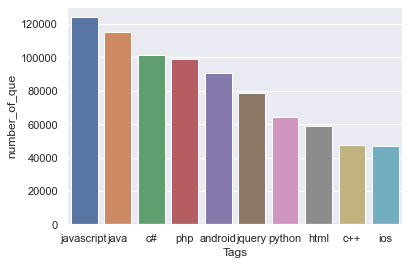

In [81]:
Df = Trending_topics_df.head(10)
sns.barplot(x = Df.Tags, y = Df.number_of_que)
plt.show()

## Analysis for expected time to find an answer

In [46]:
tags = tags.rename(columns={"id": "Id", "Tag": "tag" })
tags.head(5)

,Id,tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [47]:
que.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01 13:57:07,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01 14:41:24,2012-12-26 03:45:49,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01 15:50:08,NaT,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01 18:42:19,NaT,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01 23:22:08,NaT,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [48]:
que_wd_tags = pd.merge(
    que,tags,
    )

In [49]:
que_wd_tags.isnull()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,tag
0,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3749876,False,False,False,True,False,False,False,False
3749877,False,False,False,True,False,False,False,False
3749878,False,False,False,True,False,False,False,False
3749879,False,False,False,True,False,False,False,False


In [50]:
que_wd_tags = que_wd_tags.dropna()

In [51]:
que_wd_tags.isnull()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,tag
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3749781,False,False,False,False,False,False,False,False
3749782,False,False,False,False,False,False,False,False
3749783,False,False,False,False,False,False,False,False
3749808,False,False,False,False,False,False,False,False


In [52]:
que_wd_tags.ClosedDate =que_wd_tags.ClosedDate.astype("datetime64") 

In [94]:
que_wd_tags['query_resolved_time']= que_wd_tags.ClosedDate- que_wd_tags.CreationDate

In [95]:
que_wd_tags.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,tag,query_resolved_time
3,90,58.0,2008-08-01 14:41:24,2012-12-26 03:45:49,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn,1607 days 13:04:25
4,90,58.0,2008-08-01 14:41:24,2012-12-26 03:45:49,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,tortoisesvn,1607 days 13:04:25
5,90,58.0,2008-08-01 14:41:24,2012-12-26 03:45:49,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,branch,1607 days 13:04:25
6,90,58.0,2008-08-01 14:41:24,2012-12-26 03:45:49,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,branching-and-merging,1607 days 13:04:25
22,470,71.0,2008-08-02 15:11:47,2016-03-26 05:23:29,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,.net,2792 days 14:11:42


In [96]:
estimated_time = pd.pivot_table(que_wd_tags, index =['tag', 'query_resolved_time'])

In [97]:
estimated_time

Id  OwnerUserId  Score
tag           query_resolved_time                                
.bash-profile 0 days 00:15:30      11692100.0    1197913.0    9.0
              0 days 01:14:12      34553370.0    2469559.0    3.0
              0 days 06:41:51      29959480.0    3025403.0   -1.0
              0 days 12:22:14      38055550.0    3305546.0   -2.0
.class-file   0 days 07:36:11      39947580.0    6945958.0   -3.0
...                                       ...          ...    ...
zxing         1 days 13:36:55      21582440.0    3274952.0   -1.0
              10 days 22:21:22     17780940.0    2591002.0   -5.0
              177 days 20:43:19     5902850.0     731944.0    3.0
              435 days 06:26:05    31556400.0    2110347.0   -2.0
              689 days 06:07:00     8116990.0     115781.0   30.0

[146165 rows x 3 columns]

In [98]:
estimated_time.count()

Id             146165
OwnerUserId    146165
Score          146165
dtype: int64

In [99]:
new= estimated_time.reset_index()


In [100]:
answer_time =  estimated_time.reset_index()

In [101]:
answer_time

,tag,query_resolved_time,Id,OwnerUserId,Score
0,.bash-profile,0 days 00:15:30,11692100.0,1197913.0,9.0
1,.bash-profile,0 days 01:14:12,34553370.0,2469559.0,3.0
2,.bash-profile,0 days 06:41:51,29959480.0,3025403.0,-1.0
3,.bash-profile,0 days 12:22:14,38055550.0,3305546.0,-2.0
4,.class-file,0 days 07:36:11,39947580.0,6945958.0,-3.0
...,...,...,...,...,...
146160,zxing,1 days 13:36:55,21582440.0,3274952.0,-1.0
146161,zxing,10 days 22:21:22,17780940.0,2591002.0,-5.0
146162,zxing,177 days 20:43:19,5902850.0,731944.0,3.0
146163,zxing,435 days 06:26:05,31556400.0,2110347.0,-2.0


In [102]:
answer_time = answer_time.drop(['Id', 'OwnerUserId', 'Score'], axis=1)

In [104]:

 answer_time

,tag,query_resolved_time
0,.bash-profile,0 days 00:15:30
1,.bash-profile,0 days 01:14:12
2,.bash-profile,0 days 06:41:51
3,.bash-profile,0 days 12:22:14
4,.class-file,0 days 07:36:11
...,...,...
146160,zxing,1 days 13:36:55
146161,zxing,10 days 22:21:22
146162,zxing,177 days 20:43:19
146163,zxing,435 days 06:26:05


In [85]:
answer_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146165 entries, 0 to 146164
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   tag                  146165 non-null  object         
 1   query_resolved_time  146165 non-null  timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 2.2+ MB


In [74]:
avg_closetime = answer_time.groupby('tag')['query_resolved_time'].mean().sort_values(ascending = False)[:10]
avg_ct_highest10 = avg_closetime.to_frame()
avg_ct_highest10

DataError: No numeric types to aggregate

## Analyasis for sending notification to the right user


In [59]:
ans.count()

Id              2001316
OwnerUserId     2001316
CreationDate    2001316
ParentId        2001316
Score           2001316
Body            2001316
cre_date        2001316
cre_time        2001316
dtype: int64

In [60]:
new = new.rename(columns={"Id": "QueId","OwnerUserId":"Que_OwnerUserId" ,"Score":"que_Score"})
ans = ans.rename(columns={"Id": "AnsId","ParentId":"QueId" ,"OwnerUserId":"Ans_OwnerUserId","Score":"ans_Score"})


In [61]:
notification = pd.merge(
    new,ans
    )

C:\Users\MONIC\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1113: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [62]:
new.dtypes

tag                             object
query_resolved_time    timedelta64[ns]
QueId                          float64
Que_OwnerUserId                float64
que_Score                      float64
dtype: object

In [63]:
ans.dtypes

AnsId                       int64
Ans_OwnerUserId           float64
CreationDate       datetime64[ns]
QueId                       int64
ans_Score                   int64
Body                       object
cre_date                   object
cre_time                   object
dtype: object

In [64]:
new.QueId =new.QueId.astype("int64") 

In [65]:
new.dtypes

tag                             object
query_resolved_time    timedelta64[ns]
QueId                            int64
Que_OwnerUserId                float64
que_Score                      float64
dtype: object

In [66]:
notification = pd.merge(
    new,ans
    )

In [67]:
notification.head()

,tag,query_resolved_time,QueId,Que_OwnerUserId,que_Score,AnsId,Ans_OwnerUserId,CreationDate,ans_Score,Body,cre_date,cre_time
0,.bash-profile,0 days 00:15:30,11692100,1197913.0,9.0,11692139,382892.0,2012-07-27 16:44:37,11,<p>You need to open it with sudo.</p>\n\n<pre>...,2012-07-27,16:44:37
1,alias,0 days 00:15:30,11692100,1197913.0,9.0,11692139,382892.0,2012-07-27 16:44:37,11,<p>You need to open it with sudo.</p>\n\n<pre>...,2012-07-27,16:44:37
2,osx,0 days 00:15:30,11692100,1197913.0,9.0,11692139,382892.0,2012-07-27 16:44:37,11,<p>You need to open it with sudo.</p>\n\n<pre>...,2012-07-27,16:44:37
3,osx-snow-leopard,0 days 00:15:30,11692100,1197913.0,9.0,11692139,382892.0,2012-07-27 16:44:37,11,<p>You need to open it with sudo.</p>\n\n<pre>...,2012-07-27,16:44:37
4,permissions,0 days 00:15:30,11692100,1197913.0,9.0,11692139,382892.0,2012-07-27 16:44:37,11,<p>You need to open it with sudo.</p>\n\n<pre>...,2012-07-27,16:44:37


In [68]:
notification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247418 entries, 0 to 247417
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   tag                  247418 non-null  object         
 1   query_resolved_time  247418 non-null  timedelta64[ns]
 2   QueId                247418 non-null  int64          
 3   Que_OwnerUserId      247418 non-null  float64        
 4   que_Score            247418 non-null  float64        
 5   AnsId                247418 non-null  int64          
 6   Ans_OwnerUserId      247418 non-null  float64        
 7   CreationDate         247418 non-null  datetime64[ns] 
 8   ans_Score            247418 non-null  int64          
 9   Body                 247418 non-null  object         
 10  cre_date             247418 non-null  object         
 11  cre_time             247418 non-null  object         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4), tim

In [69]:
notification = notification.drop(['QueId', 'Que_OwnerUserId', 'AnsId', 'Body', 'cre_date', 'cre_time'], axis=1)
notification.head(5)

,tag,query_resolved_time,que_Score,Ans_OwnerUserId,CreationDate,ans_Score
0,.bash-profile,0 days 00:15:30,9.0,382892.0,2012-07-27 16:44:37,11
1,alias,0 days 00:15:30,9.0,382892.0,2012-07-27 16:44:37,11
2,osx,0 days 00:15:30,9.0,382892.0,2012-07-27 16:44:37,11
3,osx-snow-leopard,0 days 00:15:30,9.0,382892.0,2012-07-27 16:44:37,11
4,permissions,0 days 00:15:30,9.0,382892.0,2012-07-27 16:44:37,11


In [70]:
notification = pd.pivot_table(notification, index =['tag', 'query_resolved_time'])

In [71]:
notification

Ans_OwnerUserId  ans_Score  que_Score
tag           query_resolved_time                                       
.bash-profile 0 days 00:15:30             382892.0       11.0        9.0
              0 days 01:14:12             897295.0        0.0        3.0
              0 days 06:41:51            3914755.5        0.5       -1.0
              0 days 12:22:14            2393256.0        1.0       -2.0
.class-file   0 days 07:36:11            3788176.0        2.0       -3.0
...                                            ...        ...        ...
zxing         1 days 13:36:55            3276260.0        0.0       -1.0
              10 days 22:21:22            995926.0        2.0       -5.0
              177 days 20:43:19           435954.5        1.5        3.0
              435 days 06:26:05          1723242.8       -0.2       -2.0
              689 days 06:07:00          1341198.0        4.8       30.0

[121104 rows x 3 columns]

In [ ]:
notification = 